In [3]:
import os
from PIL import Image
from tqdm import tqdm

import numpy as np

In [49]:
def central_crop_and_resize(input_path, output_path, resize_size):
    # Open the image file
    with Image.open(input_path) as img:
        # Get the dimensions of the image
        width, height = img.size
        crop_size = min(width, height)
        # Calculate the crop box
        left = (width - crop_size) / 2
        top = (height - crop_size) / 2
        right = (width + crop_size) / 2
        bottom = (height + crop_size) / 2

        # Crop the image
        img_cropped = img.crop((left, top, right, bottom))

        # Resize the image
        img_resized = img_cropped.resize((resize_size, resize_size), Image.Resampling.LANCZOS)

        # Save the image as PNG
        img_resized.save(output_path, 'PNG')
        return img_resized

In [1]:
def overlap_images(background_path, overlay_path):
    # Open the background and overlay images
    background = Image.open(background_path).convert("RGBA")
    overlay = Image.open(overlay_path).convert("RGBA")

    # Ensure both images have the same size
    if background.size != overlay.size:
        overlay = overlay.resize(background.size, Image.ANTIALIAS)

    # Create a new image with the same size as the background
    combined = Image.new("RGBA", background.size)

    # Paste the background image onto the new image
    combined.paste(background, (0, 0))

    # Paste the overlay image onto the new image with alpha blending
    combined.paste(overlay, (0, 0), overlay)

    # Save the combined image
    #combined.save(output_path, 'PNG')
    return combined
    

In [8]:
def extract_alpha_channel(img):
    img = img.convert("RGBA")
    # Split the image into its RGBA channels
    r, g, b, alpha = img.split()
    return alpha

In [50]:
overlay_path = './people_512x512/0051115Q_000001_0003.png'
background_path = './backgrounds_512x512/bar_interior_117.leos-oyster-bar-2.jpg' 
overlap_images(background_path, overlay_path, output_path='a')

TypeError: overlap_images() got an unexpected keyword argument 'output_path'

In [42]:
path_orig = './PPM-100/image/'
path_out = './original_512x512/'

names = os.listdir(path_orig)
files = [(os.path.join(path_orig,f),(os.path.join(path_out,f))) for f in names]

for (orig, final) in tqdm(files): 
    if 'ipynb_checkpoints' in orig:
        continue
    central_crop_and_resize(input_path=orig, output_path=final, resize_size=512)

100%|██████████████████████████████████████████| 100/100 [00:22<00:00,  4.48it/s]


In [26]:
overlay_dir = './people_512x512/'
background_dir = './backgrounds_512x512/'

overlay_f = [os.path.join(overlay_dir,f) for f in  os.listdir(overlay_dir)]
background_f = [os.path.join(background_dir,f) for f in  os.listdir(background_dir)]

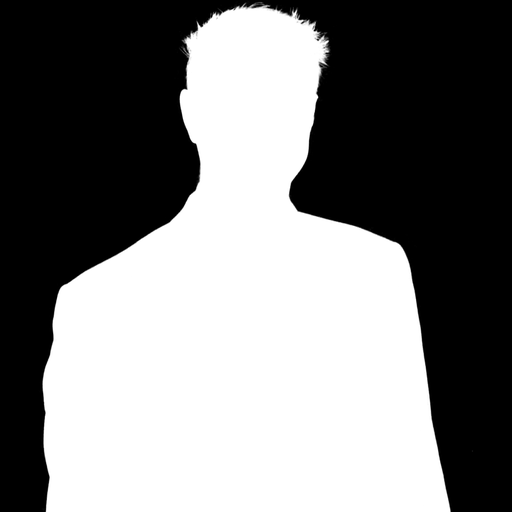

In [16]:
img = Image.open(overlay_f[0])
extract_alpha_channel(img)

In [39]:
i = 0

import random

for overlay in tqdm(overlay_f):
    i+= 1
    random.shuffle(background_f)
    for j in range(3):
        background = background_f[j]
        if 'ipynb_checkpoints' in overlay or 'ipynb_checkpoints' in background:
            continue
        ov = Image.open(overlay)
        back = Image.open(background)
        alpha = extract_alpha_channel(ov)
        overlapped = overlap_images(background, overlay)
        name = f"{background.split('/')[-1].split('.')[0]}_{i}"
        overlapped.save(os.path.join('./original_512x512',name), 'PNG')
        alpha.save(os.path.join('./matte_512x512',name), 'PNG')

100%|████████████████████████████████████████████| 86/86 [00:31<00:00,  2.69it/s]


In [17]:
def uint8(x):
    return x.astype(np.uint8)

def one_clip(x):
    return np.sign(x) 

def HardJaccard(matte_true, matte_pred):
    return uint8(one_clip(np.array(matte_true)) != one_clip(np.array(matte_pred))).sum()

def MSE(matte_true, matte_pred):
    return ((np.array(matte_true) -  np.array(matte_pred))**2).sum()

In [18]:
original = './validation/original_512x512'
matte = './validation/matte_512x512'

original_f = [os.path.join(original,f) for f in  os.listdir(original)]
matte_f = [os.path.join(matte,f) for f in  os.listdir(matte)]

In [19]:
img_i = Image.open(original_f[0])
img_ii = Image.open(original_f[2])

In [20]:
HardJaccard(img_i,img_ii)

17701

In [16]:
MSE(img_i,img_ii)

81731350